<a href="https://colab.research.google.com/github/EmilSeyfullayev/Technical-nterview/blob/main/Python_il%C9%99_H%C9%99ll%C9%99r_T%C9%99hlil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# İlk öncə lazımi kitabxanaları yükləyək

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_excel('/content/drive/MyDrive/Ministry of Transportation - Task/Task.xlsx')
df.columns=df.columns.str.replace('\n', '')

df['Hərəkət marşrutu başlanğıc'] = [i.split('-')[0] for i in df['HƏRƏKƏT MARŞRUTU']]
df['Hərəkət marşrutu təyinat'] = [i.split('-')[1] for i in df['HƏRƏKƏT MARŞRUTU']]
df['Avtomobil nömrəsi'] = [i.split(':-')[1] for i in df['AVTOMOBİLİN NÖVÜ/NÖMRƏSİ']]
df['Malın çəkisi tonla'] = df['MALIN ÇƏKİSİ (kq)']/1000

transit = df[
    (df['ÖDƏNİLƏN MƏBLƏĞ'].isin([0, 100, 150])) &
    (df['İSTİ-QAMƏT'].isin([1])) &
    (df['GÜZƏŞT NÖVÜ'].isin(['Digər azad olmalar', 'Kvota', 'Yoxdur', 'BNF icazəsi ilə (jurnal)'])) &
    (~df['Hərəkət marşrutu başlanğıc'].isin(['Azərbaycan'])) &
    (~df['Hərəkət marşrutu təyinat'].isin(['Azərbaycan']))
]

Mounted at /content/drive


# Tapşırıq №1

In [ ]:
transit.groupby('GÖMRÜK ORQANI').agg(
    {'Malın çəkisi tonla':'sum', 
     'Avtomobil nömrəsi' :'count'}
).round().sort_values(
    'Malın çəkisi tonla', ascending=False
).rename(columns={"Avtomobil nömrəsi":"NV-lərin sayı"}).reset_index()

,GÖMRÜK ORQANI,Malın çəkisi tonla,NV-lərin sayı
0,Astara g/p,46275.0,2672
1,Samur g/p,27756.0,2117
2,Qırmızı körpü g/p,23349.0,2182
3,Şahtaxtı g/p,22551.0,1034
4,Qubadlı gömrük postu,18293.0,1172
5,Culfa g/p,15553.0,685
6,Biləsuvar g/p,15178.0,833
7,Beynəlxalq Dəniz Ticarət Limanı g/p,7607.0,402
8,Sədərək g/p,4309.0,833
9,Mazımçay g/p,973.0,142


# Tapşırıq №2.1

In [ ]:
transit.groupby('Hərəkət marşrutu başlanğıc').agg(
    {'Malın çəkisi tonla':'sum', 
     'Avtomobil nömrəsi' :'count'}
).round().sort_values(
    'Malın çəkisi tonla', ascending=False
).rename(columns={"Avtomobil nömrəsi":"NV-lərin sayı"}).head(5).reset_index()

,Hərəkət marşrutu başlanğıc,Malın çəkisi tonla,NV-lərin sayı
0,İran İslam Respublikası,116035.0,6022
1,Türkiyə,18617.0,1742
2,Rusiya,13454.0,2037
3,Qazaxıstan,11134.0,596
4,Gürcüstan,7864.0,1296


# Tapşırıq №2.2

In [ ]:
transit.groupby('Hərəkət marşrutu təyinat').agg(
    {'Malın çəkisi tonla':'sum', 
     'Avtomobil nömrəsi' :'count'}
).round().sort_values(
    'Malın çəkisi tonla', ascending=False
).rename(columns={"Avtomobil nömrəsi":"NV-lərin sayı"}).head(5).reset_index()

# Tapşırıq №3

In [ ]:
transit.groupby('MƏNSUB. ÖLKƏSİ').agg(
    {'Malın çəkisi tonla':'sum', 
     'Avtomobil nömrəsi' :'count'}
).round().sort_values(
    'Malın çəkisi tonla', ascending=False
).rename(columns={"Avtomobil nömrəsi":"NV-lərin sayı"}).head(5).reset_index()

,MƏNSUB. ÖLKƏSİ,Malın çəkisi tonla,NV-lərin sayı
0,İran İslam Respublikası,76087.0,5324
1,Rusiya,44146.0,3784
2,Türkiyə,40120.0,2215
3,Gürcüstan,16350.0,1111
4,Ukrayna,1522.0,83


# Tapşırıq №4

In [ ]:
transit.groupby(['İCAZƏ BLANKI', 'GÜZƏŞT NÖVÜ']).agg(
    {'Malın çəkisi tonla':'sum', 
     'Avtomobil nömrəsi' :'count'}
).round().sort_values(
    'Malın çəkisi tonla', ascending=False
).rename(columns={"Avtomobil nömrəsi":"NV-lərin sayı"}).head(5).reset_index()

,İCAZƏ BLANKI,GÜZƏŞT NÖVÜ,Malın çəkisi tonla,NV-lərin sayı
0,"Yüklü giriş, yüksüz çıxış və tranzit keçid üçün",Kvota,86911.0,5939
1,"Yüklü giriş, yüksüz çıxış və tranzit keçid üçün",Digər azad olmalar,62504.0,4353
2,"Yüklü giriş, yüksüz çıxış və tranzit keçid üçün",Yoxdur,32456.0,2421
3,Yüklənmə üçün,Yoxdur,0.0,1


# Digər əlavə təhlillər və məlumat manipulyasiyası

In [ ]:
transit['Avtomobil növü'] = [i.split(':-')[0] for i in transit['AVTOMOBİLİN NÖVÜ/NÖMRƏSİ']]
transit['Ayın yazılma günü'] = [i.day for i in transit['YAZILMA TARİXİ']] 
transit['Günün yazılma saatı'] = [i.hour+1 for i in transit['YAZILMA TARİXİ']] 
transit['Həftənin yazılma günü'] = [i.weekday()+1 for i in transit['YAZILMA TARİXİ']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

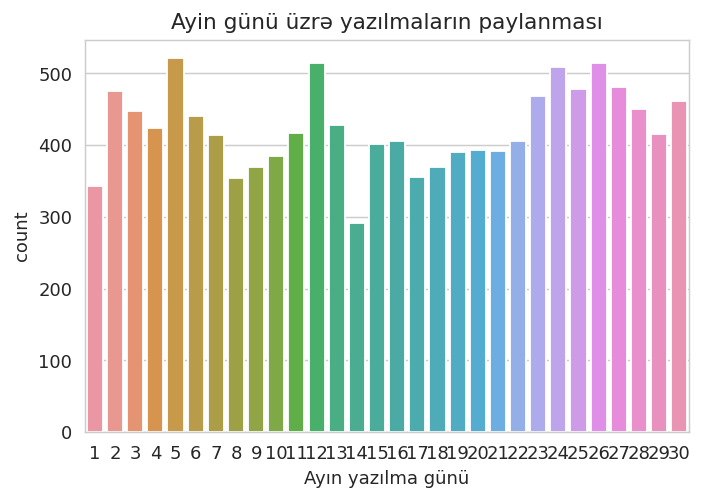

In [ ]:
plt.figure(dpi=130)
plt.title("Ayin günü üzrə yazılmaların paylanması")
sns.countplot(x=transit['Ayın yazılma günü'])
# sns.histplot(x=df['Ayın yazılma günü'], bins=30)
plt.show()

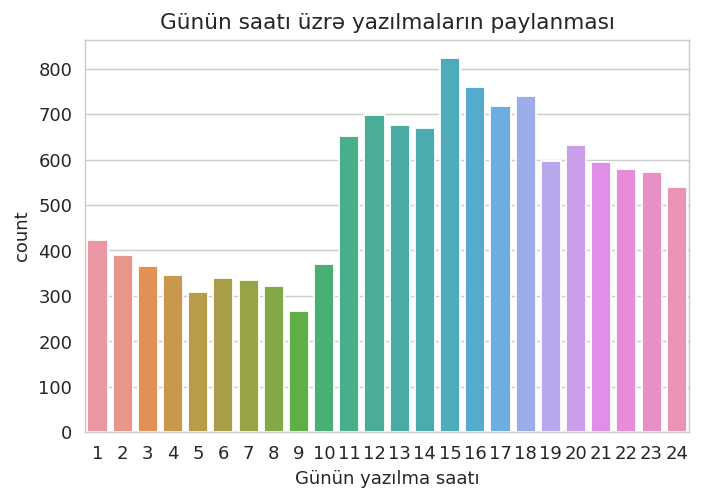

In [ ]:
plt.figure(dpi=130)
plt.title("Günün saatı üzrə yazılmaların paylanması")
sns.countplot(x=transit['Günün yazılma saatı'])
plt.show()

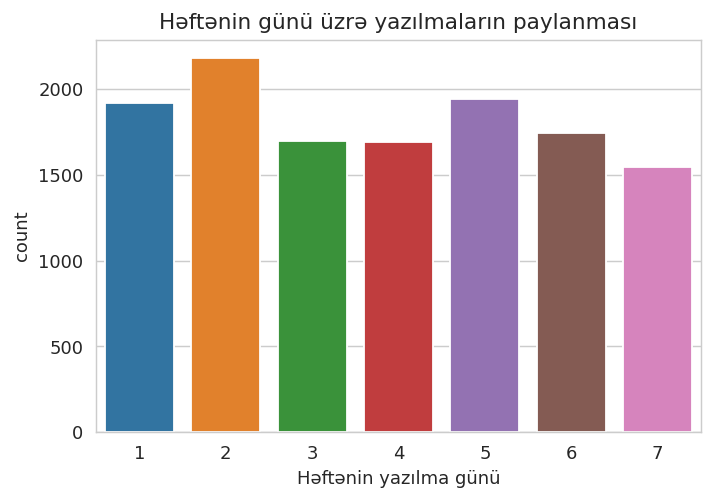

In [ ]:

plt.figure(dpi=130)
plt.title("Həftənin günü üzrə yazılmaların paylanması")
sns.countplot(x = transit['Həftənin yazılma günü'])
plt.show()

In [ ]:
5//2

2

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


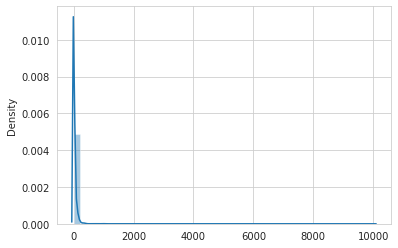

In [ ]:
difference = transit['YAZILMA TARİXİ']-transit['GİRİŞ TARİXİ']
mins = [i.total_seconds()//60 for i in difference]
sns.distplot(mins)
transit['Fərq (dəq.)'] = mins

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


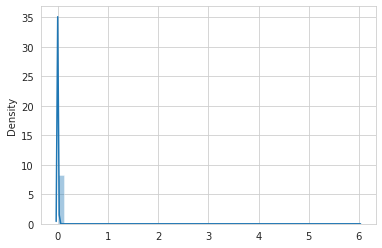

In [ ]:
difference = transit['YAZILMA TARİXİ']-transit['GİRİŞ TARİXİ']
days = [i.total_seconds()//86400 for i in difference]
sns.distplot(days)
transit['Fərq (günlə)'] = days

In [ ]:
mins_difference = []

for i in mins:
  if i<10:
    mins_difference.append("10 dəq.")
  elif (i<60)  & (i>=10):
    mins_difference.append("1 saat")
  elif (i<120)  & (i>=60):
    mins_difference.append("1-2 saat")
  elif (i<360)  & (i>=120):
    mins_difference.append("2-6 saat")
  elif (i<720)  & (i>=360):
    mins_difference.append("6-12 saat")
  else:
    mins_difference.append("12 saatdan çox")

In [ ]:
days_difference = []

for i in days:
  if i<1:
    days_difference.append("Gün ərzində")
  elif (i<2)  & (i>=1):
    days_difference.append("1-2 gün ərzində")
  elif (i<3)  & (i>=2):
    days_difference.append("2-3 gün ərzində")
  elif (i<4)  & (i>=3):
    days_difference.append("3-4 gün ərzində")
  elif (i<5)  & (i>=4):
    days_difference.append("4-5 gün ərzində")
  else:
    days_difference.append("5 gündən çox")

In [ ]:
transit['mins_difference'] = mins_difference
transit['days_difference'] = days_difference

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
pd.DataFrame(mins_difference, columns=['a']).groupby('a').agg({'a':'count'})

,a
a,
1 saat,1806
1-2 saat,1067
10 dəq.,9201
12 saatdan çox,35
2-6 saat,568
6-12 saat,37


In [ ]:
pd.DataFrame(days_difference, columns=['a']).groupby('a').agg({'a':'count'})

,a
a,
1-2 gün ərzində,3
2-3 gün ərzində,1
5 gündən çox,2
Gün ərzində,12708


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


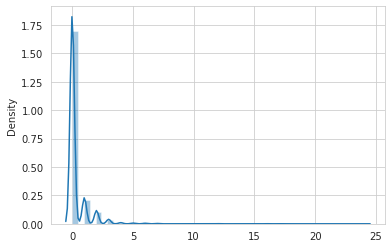

In [ ]:
sns.distplot(list(filter(lambda x: x<30, days)))

In [ ]:
transit.to_excel('preprocessed.xlsx')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


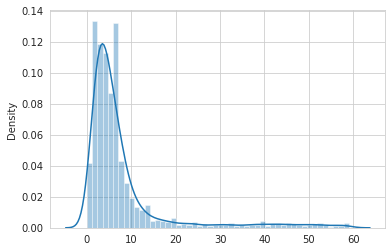

In [ ]:
sns.distplot(list(filter(lambda x: x<60, mins)))

In [ ]:
transit[
    (transit['days_difference']=='1-2 gün ərzində') &
    (transit['mins_difference']=='1-2 saat')
]

,MƏNSUB. ÖLKƏSİ,AVTOMOBİLİN NÖVÜ/NÖMRƏSİ,GİRİŞ TARİXİ,GÖMRÜK ORQANI,YAZILMA TARİXİ,İCAZƏ BLANKININ NÖMRƏSİ,ÖDƏNİLƏN MƏBLƏĞ,İSTİ-QAMƏT,İCAZƏ BLANKI,GÜZƏŞT NÖVÜ,...,Avtomobil nömrəsi,Malın çəkisi tonla,Avtomobil növü,Ayın yazılma günü,Günün yazılma saatı,Həftənin yazılma günü,Fərq (dəq.),Fərq (günlə),mins_difference,days_difference


In [ ]:
transit[~transit['days_difference'].isin(['Gün ərzində'])]

,MƏNSUB. ÖLKƏSİ,AVTOMOBİLİN NÖVÜ/NÖMRƏSİ,GİRİŞ TARİXİ,GÖMRÜK ORQANI,YAZILMA TARİXİ,İCAZƏ BLANKININ NÖMRƏSİ,ÖDƏNİLƏN MƏBLƏĞ,İSTİ-QAMƏT,İCAZƏ BLANKI,GÜZƏŞT NÖVÜ,...,Avtomobil nömrəsi,Malın çəkisi tonla,Avtomobil növü,Ayın yazılma günü,Günün yazılma saatı,Həftənin yazılma günü,Fərq (dəq.),Fərq (günlə),mins_difference,days_difference
5653,Türkmənistan,Yük avtomobili :- TDG2056,2021-11-26 18:26:27,Beynəlxalq Dəniz Ticarət Limanı g/p,2021-11-28 13:30:30,0,0,1,"Yüklü giriş, yüksüz çıxış və tranzit keçid üçün",Digər azad olmalar,...,TDG2056,12.27000,Yük avtomobili,28,14,7,2584.0,1.0,12 saatdan çox,1-2 gün ərzində
19005,İran İslam Respublikası,Dartıcı :- 10AA273,2021-11-21 13:39:51,Şahtaxtı g/p,2021-11-22 14:04:07,185404,0,1,"Yüklü giriş, yüksüz çıxış və tranzit keçid üçün",Kvota,...,10AA273,16.74400,Dartıcı,22,15,1,1464.0,1.0,12 saatdan çox,1-2 gün ərzində
28278,Gürcüstan,Dartıcı :- NN355PP,2021-11-16 08:45:32,Qırmızı körpü g/p,2021-11-17 20:59:17,0,100,1,"Yüklü giriş, yüksüz çıxış və tranzit keçid üçün",Yoxdur,...,NN355PP,13.70000,Dartıcı,17,21,3,2173.0,1.0,12 saatdan çox,1-2 gün ərzində
33598,Gürcüstan,Dartıcı :- VU480VV,2021-11-09 23:16:54,Samur g/p,2021-11-15 11:55:05,176771,0,1,"Yüklü giriş, yüksüz çıxış və tranzit keçid üçün",Digər azad olmalar,...,VU480VV,8.80793,Dartıcı,15,12,1,7958.0,5.0,12 saatdan çox,5 gündən çox
39441,Gürcüstan,Yük avtomobili :- PI421IP,2021-11-10 09:27:13,Beynəlxalq Dəniz Ticarət Limanı g/p,2021-11-12 14:15:02,177464,0,1,"Yüklü giriş, yüksüz çıxış və tranzit keçid üçün",Kvota,...,PI421IP,19.78486,Yük avtomobili,12,15,5,3167.0,2.0,12 saatdan çox,2-3 gün ərzində
41826,Türkiyə,Dartıcı :- 34HN7975,2021-11-04 13:51:13,Samur g/p,2021-11-11 13:11:26,140513,0,1,"Yüklü giriş, yüksüz çıxış və tranzit keçid üçün",Digər azad olmalar,...,34HN7975,21.75738,Dartıcı,11,14,4,10040.0,6.0,12 saatdan çox,5 gündən çox


In [ ]:
forecast_data = transit.groupby('Ayın yazılma günü').agg({'Ayın yazılma günü':'count'}).rename(columns={'Ayın yazılma günü':"Say"})

In [ ]:
forecast_data#.reset_index().iloc[:-7]

,Say
Ayın yazılma günü,
1,343
2,475
3,447
4,424
5,521
6,441
7,414
8,354
9,370


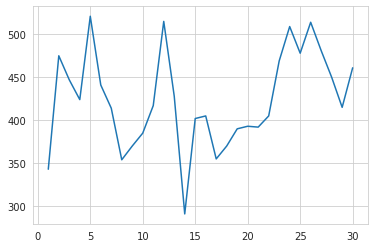

In [ ]:
plt.plot(forecast_data)

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
final_model = ExponentialSmoothing(forecast_data['Say']#.iloc[:-7]
                                   ,
                                   trend='mul',seasonal='mul',seasonal_periods=7).fit()
# forecast_predictions = final_model.forecast(121)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
forecast = final_model.forecast(8)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [ ]:
forecast

30    471.314129
31    468.043214
32    538.283065
33    481.894171
34    427.641302
35    421.413028
36    479.512406
37    478.873957
dtype: float64

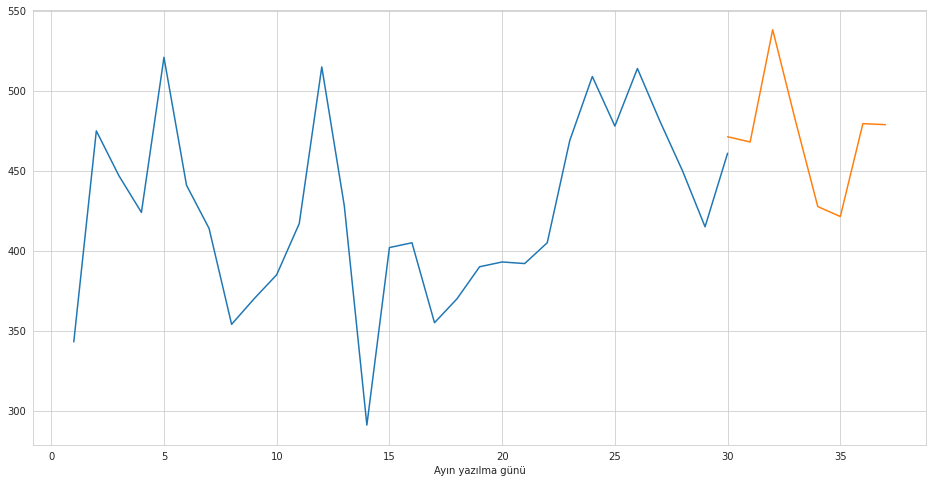

In [ ]:
forecast_data['Say'].plot(figsize=(16,8))
forecast.plot()